In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [775]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\AdultIncome.csv")
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [776]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [777]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [778]:
df.replace('?', np.nan, inplace=True)
for col in ['workclass', 'occupation', 'native.country']:
   df[col]= df[col].fillna(df[col].mode()[0])
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [779]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [780]:
df.duplicated().sum()

np.int64(24)

In [781]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [782]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [783]:
df.drop(['fnlwgt','capital.gain','capital.loss','native.country','relationship'], axis=1, inplace=True)

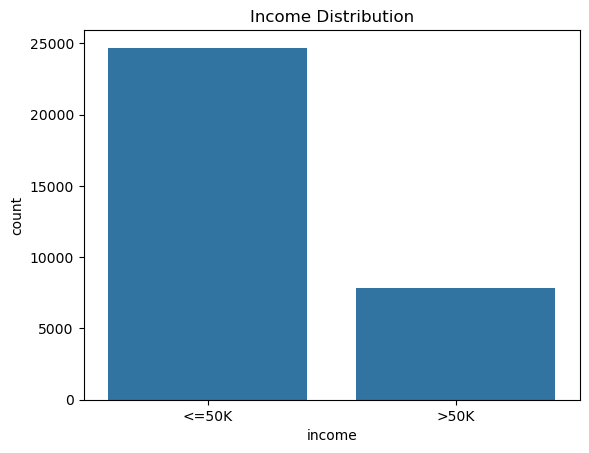

In [784]:
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

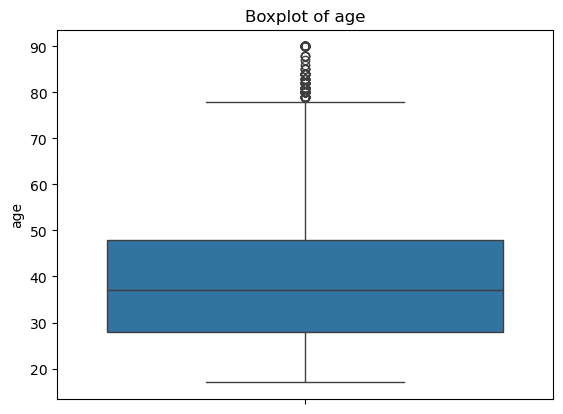

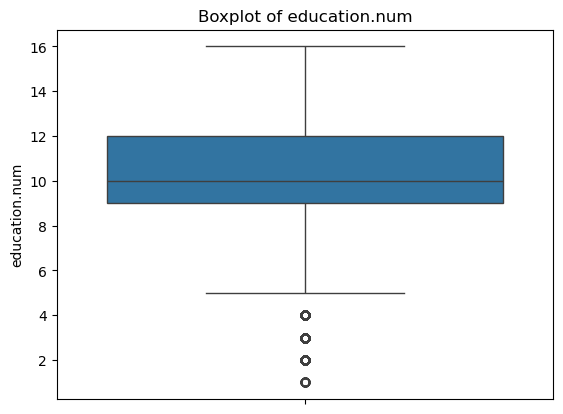

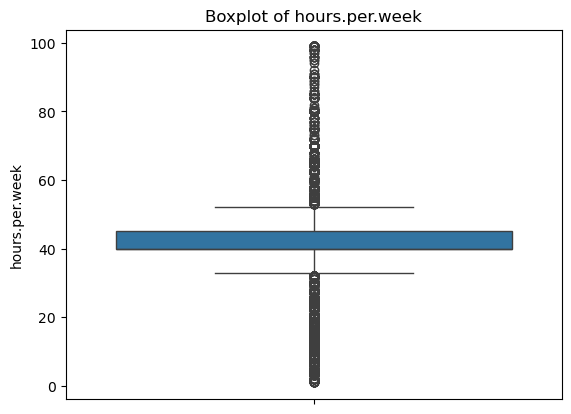

In [785]:
continuous_cols = ['age', 'education.num', 'hours.per.week']
for col in continuous_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [786]:
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

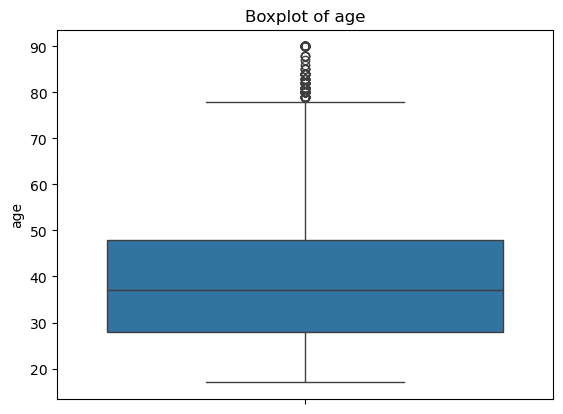

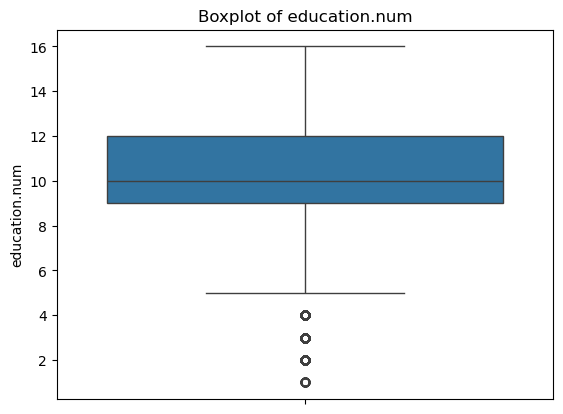

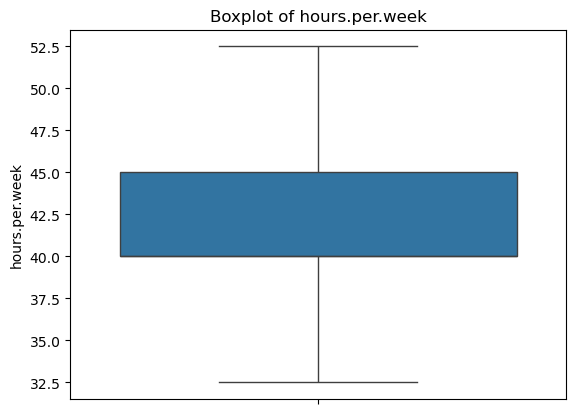

In [787]:
df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
for col in continuous_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [788]:
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

categorical_features = ['workclass', 'sex', 'marital.status', 'race', 'occupation']    
X_final = pd.get_dummies(X, columns=categorical_features, drop_first=True, dtype=int)

X_final = X_final.select_dtypes(include=[np.number])
X_final.head()

,age,education.num,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,90,9,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,9,32.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66,10,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,4,40.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,10,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [789]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [790]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [791]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 83.19%


In [792]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[6870  586]
 [1055 1251]]
